In [1]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
X = preprocessing.scale(X)

### Create model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.random.normal((4, 3), dtype=tf.float64))
        self.b = tf.Variable([0.01, 0.01, 0.01], dtype=tf.float64)
    
    def __call__(self, x):
        return tf.math.softmax(tf.matmul(x, self.W) + self.b)
    
model = Model()

### training
learning_rate = 0.1
num_epochs = 200
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = []
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = model(X)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [model.W, model.b])
        
        # update
        model.W.assign_sub(learning_rate * dW) 
        model.b.assign_sub(learning_rate * db)
        
        # parameters after one epoch
        #print('weight: \n', model.W)
        #print('bias: \n', model.b)

In [20]:
output = model(X)
print(output[:5])

tf.Tensor(
[[0.2984477  0.06793947 0.63361284]
 [0.3176681  0.07442178 0.60791012]
 [0.30387017 0.08399987 0.61212996]
 [0.31681302 0.11814009 0.56504689]
 [0.29497883 0.07727704 0.62774413]], shape=(5, 3), dtype=float64)


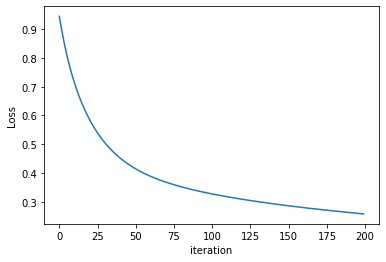

In [3]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [4]:
preds = model(X)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)
print(preds[:5])

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

(150,)
(150, 1)
[[9.72618151e-01 2.71631301e-02 2.18718805e-04]
 [9.20173515e-01 7.95328894e-02 2.93595365e-04]
 [9.75444435e-01 2.44475408e-02 1.08024257e-04]
 [9.69371310e-01 3.04821982e-02 1.46491877e-04]
 [9.84473508e-01 1.53825170e-02 1.43974922e-04]]
0.9266666666666666
